<a href="https://colab.research.google.com/github/shfjri/machine-learning-project/blob/master/Rock_Paper_Scissors_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import library yang dibutuhkan

In [ ]:
import numpy as np
import tensorflow as tf
import keras
import os
import zipfile

from google.colab import files

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import RMSprop, Adamax, Nadam, SGD 
from keras.callbacks import ModelCheckpoint

from matplotlib import pyplot as plt
from matplotlib import image as img

Using TensorFlow backend.


Mengunduh dataset training

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rps.zip

--2020-05-14 07:19:11--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 307.92M  8.68MB/s    in 52s     

2020-05-14 07:20:04 (5.97 MB/s) - ‘/tmp/rps.zip’ saved [322873683/322873683]



Mengekstrak dataset training

In [ ]:
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Direktori dataset training yang digunakan

In [ ]:
source_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'rock', 'README_rpc-cv-images.txt', 'scissors']

Membuat generator untuk augmentasi gambar dengan ImageDataGenerator dan memecah dataset training menjadi training dan validasi

In [ ]:
augmentation_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    validation_split = 0.2
)

train_gen = augmentation_gen.flow_from_directory(
    source_dir,
    target_size = (150,150),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)

val_gen = augmentation_gen.flow_from_directory(
    source_dir,
    target_size=(150,150),
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode='categorical',
    shuffle=False,
    subset = 'validation'
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


Membuat model CNN untuk klasifikasi gambar

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding = 'Same', activation = 'relu', input_shape = (150,150,1)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.15))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(3, activation='softmax'))

Menentukan optimizer, loss, callback dan melihat jumlah parameter yang digunakan pada model

In [ ]:
adamax = Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(loss = keras.losses.categorical_crossentropy, 
              optimizer = 'adamax', 
              metrics = ['accuracy'])

filepath = 'rps.h5'

checkpoint = ModelCheckpoint(filepath, 
                             monitor = 'val_accuracy', 
                             verbose = 1, 
                             save_best_only = True, 
                             mode = 'max')

callback_list = [checkpoint]

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 18, 18, 128)      

Melatih model dengan data training dan validasi

In [ ]:
cnn_model = model.fit_generator(
    train_gen,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_gen,
    validation_steps = 10,
    callbacks = callback_list,
    verbose = 1
)

Epoch 1/20
25/25 [==============================] - 9s 349ms/step - loss: 1.4649 - accuracy: 0.3275 - val_loss: 0.9875 - val_accuracy: 0.1031

Epoch 00001: val_accuracy improved from -inf to 0.10312, saving model to rps.h5
Epoch 2/20
25/25 [==============================] - 4s 164ms/step - loss: 1.0904 - accuracy: 0.4112 - val_loss: 1.0417 - val_accuracy: 0.3851

Epoch 00002: val_accuracy improved from 0.10312 to 0.38511, saving model to rps.h5
Epoch 3/20
25/25 [==============================] - 4s 147ms/step - loss: 1.0539 - accuracy: 0.4652 - val_loss: 1.0508 - val_accuracy: 0.8285

Epoch 00003: val_accuracy improved from 0.38511 to 0.82848, saving model to rps.h5
Epoch 4/20
25/25 [==============================] - 3s 139ms/step - loss: 0.9287 - accuracy: 0.6574 - val_loss: 1.0204 - val_accuracy: 0.6250

Epoch 00004: val_accuracy did not improve from 0.82848
Epoch 5/20
25/25 [==============================] - 5s 185ms/step - loss: 0.7438 - accuracy: 0.7150 - val_loss: 0.7013 - val_ac

Memprediksi gambar baru

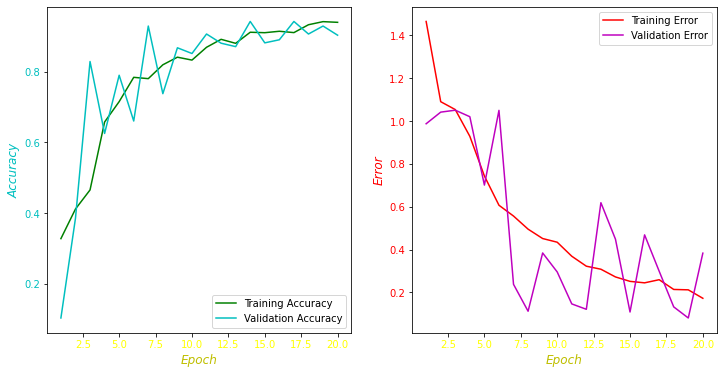

In [ ]:
ep = np.arange(1,21,1)

fig, ax = plt.subplots(1, 2, figsize=(12,6))

c1 = 'magenta'
c2 = 'red'
c3 = 'yellow'

ax[0].set_xlabel('Epoch', style='italic', size=12, color='y')
ax[0].set_ylabel('Accuracy', style='italic', size = 12, color = 'c')
ax[0].plot(ep, cnn_model.history['accuracy'], color = 'g')
ax[0].plot(ep, cnn_model.history['val_accuracy'], color = 'c')
ax[0].tick_params(axis='x', labelcolor=c3)
ax[0].tick_params(axis='y', labelcolor='c')
ax[0].legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')

ax[1].set_xlabel('Epoch', style='italic', size=12, color='y')
ax[1].set_ylabel('Error', style = 'italic', size = 12, color = 'r')
ax[1].plot(ep, cnn_model.history['loss'], color = 'r')
ax[1].plot(ep, cnn_model.history['val_loss'], color = 'm')
ax[1].tick_params(axis='x', labelcolor=c3)
ax[1].tick_params(axis='y', labelcolor=c2)
ax[1].legend(['Training Error', 'Validation Error'], loc='upper right')

Saving testpaper02-01.png to testpaper02-01 (3).png
Saving testrock03-02.png to testrock03-02 (3).png
Saving testscissors02-22.png to testscissors02-22 (3).png
testpaper02-01.png
paper
testrock03-02.png
rock
testscissors02-22.png
scissors


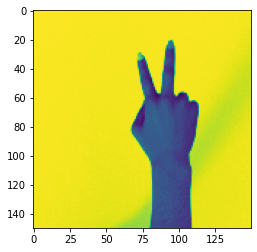

In [ ]:
best_model = keras.models.load_model('rps.h5') # Memuat model dengan akurasi terbaik selama training

test = files.upload()

for n in test.keys():

  path = n
  
  test_image = image.load_img(path, color_mode='grayscale', target_size=(150,150))
  image_plot = plt.imshow(test_image)

  x = image.img_to_array(test_image)
  x = np.expand_dims(x, axis = 0)
  x = x.astype('float32') / 255
  
  images = np.vstack([x])
  target = best_model.predict_classes(images, batch_size=10)
  
  print(n)

  if target==0:
    print('paper')
  elif target==1:
    print('rock')
  else:
    print('scissors')

# Referensi

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/load_img

https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model

https://keras.io/callbacks/

https://github.com/Terrance-Whitehurst/Rock-Paper-Scissors-Keras-Classification/blob/master/rock-paper-scissors-keras-cnn-99-accuracy.ipynb

https://github.com/lmoroney/io19/blob/master/Zero%20to%20Hero/Rock-Paper-Scissors.ipynb

https://www.tutorialspoint.com/matplotlib/matplotlib_subplots_function.htm

https://matplotlib.org/2.0.2/api/colors_api.html

https://medium.com/octavian-ai/which-optimizer-and-learning-rate-should-i-use-for-deep-learning-5acb418f9b2

https://www.kaggle.com/c/human-protein-atlas-image-classification/discussion/70253

https://keras.io/preprocessing/image/
